In [395]:
# Kütüphaneleri import etme aşaması 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [397]:
data_path="employee_performance.csv"

In [399]:
df=pd.read_csv(data_path) 

In [401]:
df.head()

,Employee_ID,Age,Gender,Department,Experience_Years,Performance_Score,Salary
0,E0524,49,Female,Operations,5.6,67.8,33013.0
1,E0603,55,Female,Sales,5.5,NaN,42640.0
2,E0527,29,Female,Sales,10.7,68.8,72180.0
3,E0032,30,Female,Operations,9.8,NaN,65750.0
4,E0617,58,Male,Sales,11.5,72.8,74830.0


In [403]:
df=df.drop("Employee_ID",axis=1)

In [405]:
df.head()

,Age,Gender,Department,Experience_Years,Performance_Score,Salary
0,49,Female,Operations,5.6,67.8,33013.0
1,55,Female,Sales,5.5,NaN,42640.0
2,29,Female,Sales,10.7,68.8,72180.0
3,30,Female,Operations,9.8,NaN,65750.0
4,58,Male,Sales,11.5,72.8,74830.0


In [407]:
df.dropna(inplace=True)

In [409]:
df.isnull().sum()

Age                  0
Gender               0
Department           0
Experience_Years     0
Performance_Score    0
Salary               0
dtype: int64

In [411]:
df.duplicated().sum()

18

In [413]:
df = df.drop_duplicates()

In [415]:
df.duplicated().sum()

0

In [417]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print(df['Salary'].describe())

count      926.000000
mean     50167.034557
std      15521.423096
min      20000.000000
25%      39007.750000
50%      50562.000000
75%      60691.250000
max      93195.000000
Name: Salary, dtype: float64


In [419]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,926.0,40.954644,11.212546,22.0,31.00,42.0,51.00,59.0
Experience_Years,926.0,7.193521,3.011800,0.0,5.20,7.2,9.20,15.8
Performance_Score,926.0,69.776350,10.013112,38.1,62.90,70.0,76.70,97.5
Salary,926.0,50167.034557,15521.423096,20000.0,39007.75,50562.0,60691.25,93195.0


In [421]:
df["Department"].value_counts()

Department
Marketing     166
Sales         165
Operations    164
Finance       157
HR            145
IT            129
Name: count, dtype: int64

In [423]:
le=LabelEncoder()

In [425]:
df=pd.get_dummies(df,columns=["Department"],dtype=int)

In [427]:
df.head()

,Age,Gender,Experience_Years,Performance_Score,Salary,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales
0,49,Female,5.6,67.8,33013.0,0,0,0,0,1,0
2,29,Female,10.7,68.8,72180.0,0,0,0,0,0,1
4,58,Male,11.5,72.8,74830.0,0,0,0,0,0,1
5,46,Female,2.3,73.6,25481.0,0,0,0,0,0,1
6,56,Male,9.7,85.5,72051.0,0,0,0,0,0,1


In [429]:
df["Gender"] = le.fit_transform(df["Gender"])

In [431]:
df.head()

,Age,Gender,Experience_Years,Performance_Score,Salary,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales
0,49,0,5.6,67.8,33013.0,0,0,0,0,1,0
2,29,0,10.7,68.8,72180.0,0,0,0,0,0,1
4,58,1,11.5,72.8,74830.0,0,0,0,0,0,1
5,46,0,2.3,73.6,25481.0,0,0,0,0,0,1
6,56,1,9.7,85.5,72051.0,0,0,0,0,0,1


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    926 non-null    int64  
 1   Gender                 926 non-null    int32  
 2   Experience_Years       926 non-null    float64
 3   Performance_Score      926 non-null    float64
 4   Salary                 926 non-null    float64
 5   Department_Finance     926 non-null    int32  
 6   Department_HR          926 non-null    int32  
 7   Department_IT          926 non-null    int32  
 8   Department_Marketing   926 non-null    int32  
 9   Department_Operations  926 non-null    int32  
 10  Department_Sales       926 non-null    int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 61.5 KB


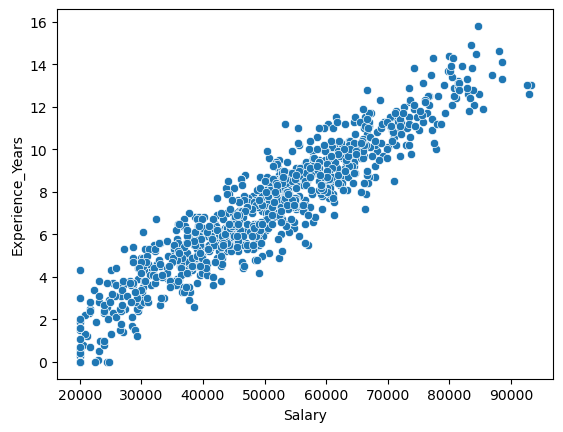

In [435]:
sns.scatterplot(x=df["Salary"],y=df["Experience_Years"])
plt.show()

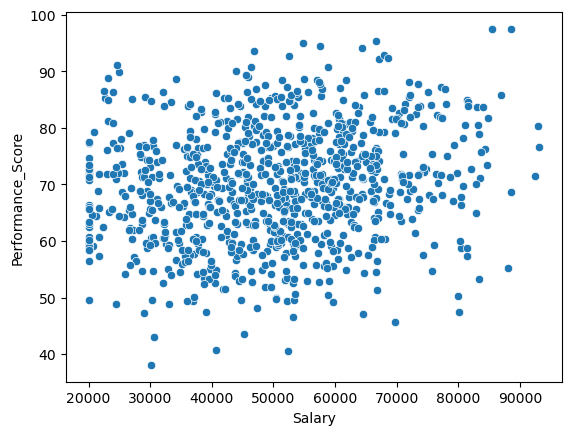

In [436]:
sns.scatterplot(x=df["Salary"],y=df["Performance_Score"])
plt.show()

In [438]:
X=df.drop("Salary",axis=1)
y=df["Salary"]

In [441]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [443]:
scaler=StandardScaler()

In [445]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [447]:
regression=LinearRegression()

In [449]:
lin_model=regression.fit(X_train_scaled,y_train)

In [451]:
y_pred=lin_model.predict(X_test_scaled)

In [453]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Absoluete Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R2 Score :",r2)

Mean Absoluete Error : 3997.8657398191326
Mean Squared Error : 24943746.70159634
Root Mean Squared Error : 4994.371502160841
R2 Score : 0.8874670786081515


In [469]:
svr=SVR()
svr.fit(X_train_scaled,y_train)
y_pred=svr.predict(X_test_scaled,)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute Error :",mae)
print("Mean squered Error :",mse)
print("R score error :",score)

Mean absolute Error : 12149.237449831518
Mean squered Error : 222168499.62861958
R score error : -0.002306133218243911


In [471]:
from sklearn .model_selection import GridSearchCV
param_grid= {"C":[0.1,1,100,100],
            "gamma":[1,0.1,0.001],
             "kernel": ["rbf","linear"]
            }

In [473]:
grid=GridSearchCV(estimator=SVR(),param_grid=param_grid,n_jobs=-1,verbose=3)

In [475]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

Mean absolute Error : 4237.503109767822
Mean squered Error : 27626594.299957383
R score error : 0.8753634968365587


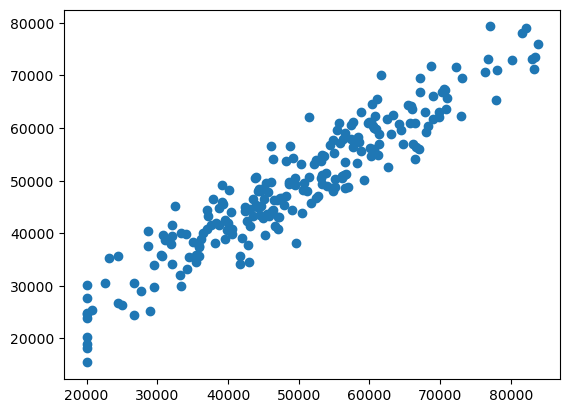

In [477]:
y_pred=grid.predict(X_test_scaled,)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute Error :",mae)
print("Mean squered Error :",mse)
print("R score error :",score)
plt.scatter(y_test,y_pred)     
plt.show()

In [479]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [481]:
grid.best_score_

0.8923235818906636